# Treinando LSTMs com o dataset IMDB

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPool1D, Dropout, Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import sys
import warnings

In [2]:
# Desativa os avisos
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
# Carrega o dataset contendo as 5000 palavras mais utilizadas do dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words = 5000)

In [4]:
# Separando os dados de treino
x_aux, y_aux = x_test, y_test
x_test = x_aux[:15000]
y_test = y_aux[:15000]
x_validation = x_aux[15000:]
y_validation = y_aux[15000:]

del x_aux, y_aux

In [5]:
# Exibindo a quantidade de listas dentro do dataset
print("X train: ", len(x_train))
print("Y train: ", len(y_train))
print("X test: ", len(x_test))
print("Y test: ", len(y_test))
print("X validation: ", len(x_validation))
print("Y validation: ", len(y_validation))

X train:  25000
Y train:  25000
X test:  15000
Y test:  15000
X validation:  10000
Y validation:  10000


In [6]:
# Exibindo o comprimento das 10 primeiras listas do dataset
for l, t in zip(x_train[:10], y_train[:10]):
    print(f"Comprimento lista : {len(l)} - Target: {t}")

Comprimento lista : 218 - Target: 1
Comprimento lista : 189 - Target: 0
Comprimento lista : 141 - Target: 0
Comprimento lista : 550 - Target: 1
Comprimento lista : 147 - Target: 0
Comprimento lista : 43 - Target: 0
Comprimento lista : 123 - Target: 1
Comprimento lista : 562 - Target: 0
Comprimento lista : 233 - Target: 1
Comprimento lista : 130 - Target: 0


Para o treinamento será necessário deixar todas as listas no mesmo tamanho.

In [7]:
# Truncando as sequências de entrada de treinamento e teste para ficarem todas no mesmo tamanho
# O modelo aprenderá que valores 0 não possuem informação
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)
x_validation = sequence.pad_sequences(x_validation, maxlen=500)

In [8]:
# Verificando novamente as 10 primeiras listas do dataset de treino
for x, y in zip(x_train[:10], y_train[:10]):
    print(f"Comprimento da lista: {len(x)} - Target: {y}")

Comprimento da lista: 500 - Target: 1
Comprimento da lista: 500 - Target: 0
Comprimento da lista: 500 - Target: 0
Comprimento da lista: 500 - Target: 1
Comprimento da lista: 500 - Target: 0
Comprimento da lista: 500 - Target: 0
Comprimento da lista: 500 - Target: 1
Comprimento da lista: 500 - Target: 0
Comprimento da lista: 500 - Target: 1
Comprimento da lista: 500 - Target: 0


Agora sim está adequado para o treinamento.

## Definindo algumas funções 

In [9]:
def exibir_performance_dados_teste(loss, accuracy):
    print("Loss: %.2f" % (loss * 100))
    print("Accuracy: %.2f" % (accuracy * 100))

In [10]:
def exibir_evolucao_treino_validacao(train_hist, train, validation):
    plt.plot(train_hist.history[train])
    plt.plot(train_hist.history[validation])
    plt.title("Histórico do treinamento")
    plt.ylabel(train)
    plt.xlabel("epoch")
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

# Criando vários modelos

## LSTM

In [11]:
# Criando o primeiro modelo
model1 = Sequential()

# Parâmetros:
# input_dim = tamanho do vocabulário do dataset. Nesse caso, 5000.
# output_dim = tamanho do vetor para representar cada palavra.
# input_length = tamanho de cada vetor de saída.
model1.add(Embedding(input_dim = 5000, output_dim = 64, input_length = 500))

# Camada LSTM com 100 neurônios
model1.add(LSTM(100))

# Camada de saída com um neurônio e função sigmoid
model1.add(Dense(1, activation = 'sigmoid'))

In [12]:
# Compilando o modelo
model1.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

In [13]:
# Verificando a arquitetura da rede
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 64)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               66000     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 386,101
Trainable params: 386,101
Non-trainable params: 0
_________________________________________________________________


In [14]:
%time

# Treinando o modelo
hist = model1.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size = 128, epochs = 10)

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 20 µs
Epoch 1/10
196/196 [==============================] - 8s 39ms/step - loss: 0.5168 - accuracy: 0.7442 - val_loss: 0.3653 - val_accuracy: 0.8452
Epoch 2/10
196/196 [==============================] - 7s 37ms/step - loss: 0.3466 - accuracy: 0.8603 - val_loss: 0.3242 - val_accuracy: 0.8710
Epoch 3/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2494 - accuracy: 0.9022 - val_loss: 0.3101 - val_accuracy: 0.8673
Epoch 4/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2076 - accuracy: 0.9226 - val_loss: 0.2967 - val_accuracy: 0.8836
Epoch 5/10
196/196 [==============================] - 7s 37ms/step - loss: 0.1868 - accuracy: 0.9306 - val_loss: 0.3059 - val_accuracy: 0.8771
Epoch 6/10
196/196 [==============================] - 7s 37ms/step - loss: 0.1650 - accuracy: 0.9398 - val_loss: 0.3351 - val_accuracy: 0.8644
Epoch 7/10
196/196 [==============================] - 7s 37ms/step - loss: 

In [15]:
# Avaliando o modelo
loss, accuracy = model1.evaluate(x_test, y_test)

exibir_performance_dados_teste(loss, accuracy)

469/469 [==============================] - 5s 10ms/step - loss: 0.3839 - accuracy: 0.8585
Loss: 38.39
Accuracy: 85.85


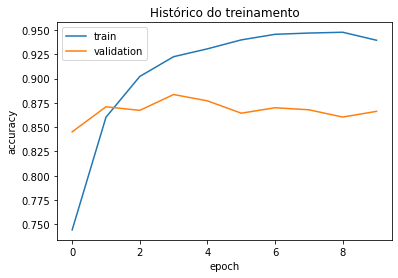

In [16]:
# Exibindo a evolução dos dados de treino e validação
exibir_evolucao_treino_validacao(hist, 'accuracy', 'val_accuracy')

## LSTM com técnica de regulização Dropout

O objetivo do segundo modelo é melhorar a generalização do modelo aplicando a técnica de regularização Dropout.

In [18]:
# Criando o modelo
model2 = Sequential()

# Parâmetros:
# input_dim = tamanho do vocabulário do dataset. Nesse caso, 5000.
# output_dim = tamanho do vetor para representar cada palavra.
# input_length = tamanho de cada vetor de saída.
model2.add(Embedding(input_dim = 5000, output_dim = 64, input_length = 500))

# Camada Dropout com 25% de drop
model2.add(Dropout(0.25))

# Camada LSTM com 100 neurônios
model2.add(LSTM(100))

# Camada Dropout com 25% de drop
model2.add(Dropout(0.25))

# Última camada com 1 neurônio de saída e função de ativação sigmoid
model2.add(Dense(1, activation = 'sigmoid'))

In [19]:
# Compilando o modelo
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
# Visualizando a arquitetura da rede
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 386,101
Trainable params: 386,101
Non-trainable params: 0
_________________________________________________________________


In [21]:
%time

# Treinando o modelo
hist = model2.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size = 128, epochs = 10)

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 25.5 µs
Epoch 1/10
196/196 [==============================] - 8s 39ms/step - loss: 0.5290 - accuracy: 0.7239 - val_loss: 0.3568 - val_accuracy: 0.8521
Epoch 2/10
196/196 [==============================] - 7s 38ms/step - loss: 0.3222 - accuracy: 0.8644 - val_loss: 0.3058 - val_accuracy: 0.8823
Epoch 3/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2460 - accuracy: 0.9027 - val_loss: 0.3028 - val_accuracy: 0.8728
Epoch 4/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2157 - accuracy: 0.9192 - val_loss: 0.2970 - val_accuracy: 0.8834
Epoch 5/10
196/196 [==============================] - 7s 37ms/step - loss: 0.1877 - accuracy: 0.9298 - val_loss: 0.3144 - val_accuracy: 0.8633
Epoch 6/10
196/196 [==============================] - 7s 38ms/step - loss: 0.1672 - accuracy: 0.9389 - val_loss: 0.3327 - val_accuracy: 0.8611
Epoch 7/10
196/196 [==============================] - 7s 38ms/step - loss: 0

In [22]:
# Avaliando o modelo
loss, accuracy = model2.evaluate(x_test, y_test)

exibir_performance_dados_teste(loss, accuracy)

469/469 [==============================] - 5s 10ms/step - loss: 0.4350 - accuracy: 0.8008
Loss: 43.50
Accuracy: 80.08


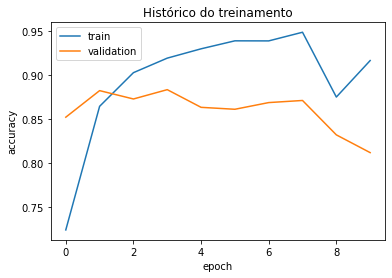

In [23]:
# Exibindo a evolução dos dados de treino e validação
exibir_evolucao_treino_validacao(hist, 'accuracy', 'val_accuracy')

## LSTM como CNN e Técnicas de regularização

O objetivo do terceiro modelo é aplicar uma camada de CNN e mais uma técnica de regularização

In [27]:
# Criando o modelo
model3 = Sequential()

# Parâmetros:
# input_dim = tamanho do vocabulário do dataset. Nesse caso, 5000.
# output_dim = tamanho do vetor para representar cada palavra.
# input_length = tamanho de cada vetor de saída.
model3.add(Embedding(input_dim = 5000, output_dim = 64, input_length = 500))

# Camada de convolução
model3.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))

# Camada de pooling
model3.add(MaxPool1D(pool_size = 2))

# Camada de Dropout com 25%
model3.add(Dropout(0.25))

# Camada LSTM com 100 neurônios, 1 camada de dropout antes e uma depois, ambas com 25% de drop
#model3.add(LSTM(100, dropout = 0.25, recurrent_dropout = 0.25))
model3.add(LSTM(100))

# Camada de Dropout com 25%
model3.add(Dropout(0.25))

# Última camada com 1 neurônio de saída e função de ativação sigmoid
model3.add(Dense(units = 1, activation = 'sigmoid'))

In [28]:
# Compilando o modelo
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
# Exibindo a arquitetura da rede
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 64)           12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 64)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 250, 64)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [30]:
# Definindo o EarlyStopping e treinando o modelo
monitor = EarlyStopping(monitor = 'val_loss', min_delta=1e-1, patience = 5, verbose = 3, mode = 'auto')

hist = model3.fit(x_train,
                  y_train,
                  validation_data = (x_validation, y_validation),
                  callbacks = [monitor],
                  batch_size = 64, 
                  epochs = 100)

Epoch 1/100
391/391 [==============================] - 9s 24ms/step - loss: 0.4131 - accuracy: 0.7997 - val_loss: 0.2752 - val_accuracy: 0.8867
Epoch 2/100
391/391 [==============================] - 9s 23ms/step - loss: 0.2475 - accuracy: 0.9058 - val_loss: 0.2694 - val_accuracy: 0.8883
Epoch 3/100
391/391 [==============================] - 9s 23ms/step - loss: 0.1888 - accuracy: 0.9303 - val_loss: 0.3321 - val_accuracy: 0.8775
Epoch 4/100
391/391 [==============================] - 9s 23ms/step - loss: 0.1561 - accuracy: 0.9431 - val_loss: 0.2961 - val_accuracy: 0.8831
Epoch 5/100
391/391 [==============================] - 9s 22ms/step - loss: 0.1310 - accuracy: 0.9548 - val_loss: 0.3410 - val_accuracy: 0.8841
Epoch 6/100
391/391 [==============================] - 9s 23ms/step - loss: 0.1097 - accuracy: 0.9617 - val_loss: 0.3864 - val_accuracy: 0.8709
Epoch 00006: early stopping


In [31]:
# Avaliando o modelo
loss, accuracy = model3.evaluate(x_test, y_test)

exibir_performance_dados_teste(loss, accuracy)

469/469 [==============================] - 3s 7ms/step - loss: 0.4061 - accuracy: 0.8651
Loss: 40.61
Accuracy: 86.51


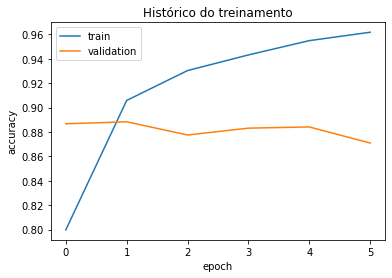

In [32]:
#xibindo a evolução do modelo
exibir_evolucao_treino_validacao(hist, 'accuracy', 'val_accuracy')

Com 86,51% de acurácia nos dados de teste, o último modelo (model3) foi o que apresentou o melhor resultado. Utilizando EarlyStopping, consegui obter o melhor modelo com apenas 6 epochs.